In [1]:
# 패키지 설치 (코랩셀레니움, Google Gemini)
!pip install google-colab-selenium
!pip install google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00


In [2]:
import google_colab_selenium as gs
import time

# 웹사이트 크롤링 PNG 함수 정의

def crawling_website_by_png(url, filename):
  driver = gs.Chrome()

  try:
    print(f"URL : {url}")
    driver.get(url)
    time.sleep(3)

    total_height = driver.execute_script("return document.body.scrollHeight")
    driver.set_window_size(1920, total_height)
    time.sleep(1)

    driver.save_screenshot(filename)
    print(f"Save : {filename}")

    return filename

  except Exception as e:
    print(f"ERROR : {e}")

    return None

  finally:
    driver.quit()

# 웹사이트 크롤링 HTML 함수 정의

def crawling_website_by_html(url, filename):
  driver = gs.Chrome()

  try:
    print(f"URL : {url}")
    driver.get(url)
    time.sleep(3)

    html = driver.page_source

    with open(filename, "w", encoding="utf-8") as f:
      f.write(html)

    print(f"Save : {filename}")

    return filename

  except Exception as e:
    print(f"ERROR : {e}")

    return None

  finally:
    driver.quit()


In [3]:
import google.generativeai as genai
from PIL import Image
from bs4 import BeautifulSoup

# API_KEY = "YOUR_API_KEY"
genai.configure(api_key=API_KEY)
model = genai.GenerativeModel('gemini-2.5-flash')

def gemini_summarize_html_raw(filename):
    with open(filename, "r", encoding="utf-8") as f:
        html_raw = f.read()

    prompt = f"다음 내용을 요약해주세요:\n\n{html_raw}"
    response = model.generate_content(prompt)

    return response


def gemini_summarize_html_without_tag(filename):
    with open(filename, "r", encoding="utf-8") as f:
        html = f.read()

    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text().strip()

    prompt = f"다음 내용을 요약해주세요:\n\n{text}"
    response = model.generate_content(prompt)

    return response

def gemini_summarize_png(filename):
    img = Image.open(filename)

    prompt = "다음 내용을 요약해주세요"
    response = model.generate_content([prompt, img])

    return response


In [4]:
website_url = "https://finance.yahoo.com/news/beyond-meat-earns-meme-stock-134030887.html"
base_filename = "page"

crawling_website_by_png(website_url, base_filename + ".png")
crawling_website_by_html(website_url, base_filename + ".html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

URL : https://finance.yahoo.com/news/beyond-meat-earns-meme-stock-134030887.html
Save : page.png


<IPython.core.display.Javascript object>

URL : https://finance.yahoo.com/news/beyond-meat-earns-meme-stock-134030887.html
Save : page.html


'page.html'

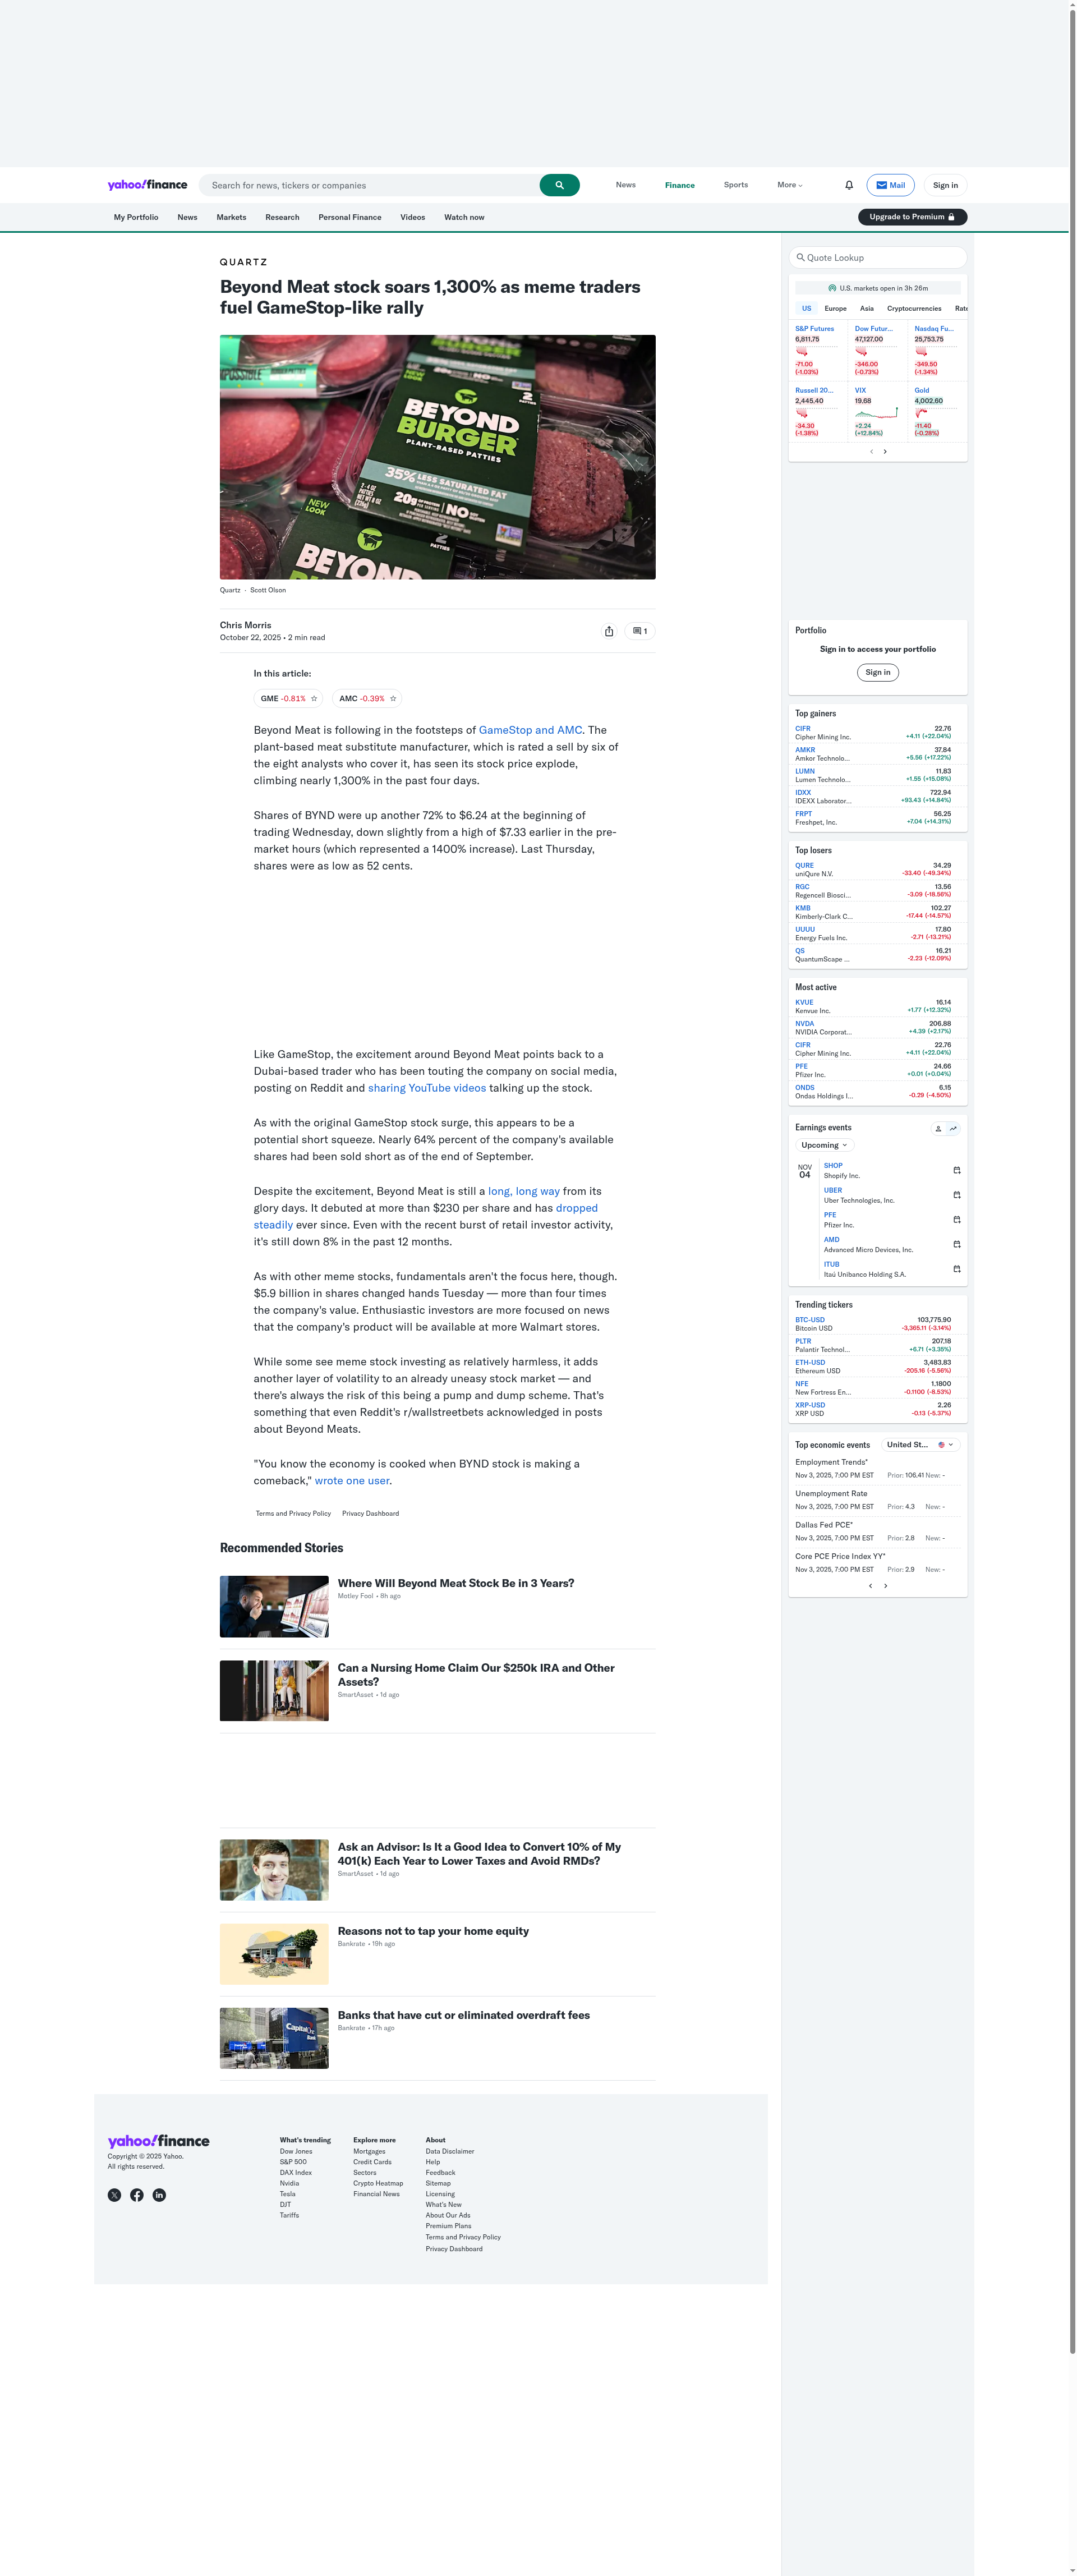

In [5]:
# PNG
from IPython.display import Image as DisplayImage
display(DisplayImage(filename="page.png"))

In [6]:
# RAW HTML
with open("page.html", "r", encoding="utf-8") as f:
    html = f.read()
print(html)


<html lang="en-US" theme="auto" data-color-theme-enabled="true" data-color-scheme="auto" class="desktop neo-green dock-upscale"><head>
        <meta charset="utf-8">
        <meta name="oath:guce:consent-host" content="guce.yahoo.com">
        <link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"><link rel="preconnect" href="//geo.yahoo.com"><link rel="preconnect" href="//query1.finance.yahoo.com"><link rel="preconnect" href="//query2.finance.yahoo.com"><link rel="preconnect" href="//consent.cmp.oath.com"><link rel="preload" href="/__rapidworker-1.2.js" as="worker"><link rel="preconnect" href="https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.adb9bf9ae7922cf2dccf.js"><link rel="preconnect" href="https://cdn.jsdelivr.net/npm/protobufjs@7.1.2/dist/minimal/protobuf.min.js"><script>window.finNeoPageStart = Date.now();</script><script>(function(){if(!window.YAHOO){window.YAHOO={}}; window.YAHOO.context={"consent":{"allowContentPersonalization":true,"allowCrossDeviceMa

In [7]:
# Tagless HTML
from bs4 import BeautifulSoup

with open("page.html", "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f.read(), "html.parser")

text = soup.get_text(separator="\n", strip=True)
print(text)


Beyond Meat stock soars 1,300% as meme traders fuel GameStop-like rally
Oops, something went wrong
Skip to navigation
Skip to main content
Skip to right column
News
Today's news
US
Politics
World
Weather
Climate change
Health
Wellness
Mental health
Sexual health
Dermatology
Oral health
Hair loss
Foot health
Nutrition
Healthy eating
Meal delivery
Weight loss
Vitamins and supplements
Fitness
Equipment
Exercise
Women’s health
Sleep
Healthy aging
Hearing
Mobility
Science
Originals
The 360
Newsletters
Games
Life
Health
Wellness
Nutrition
Fitness
Healthy aging
Mental health
Sleep
Your body
Dermatology
Children's health
Foot health
Hair loss
Hearing
Oral health
Sexual health
Women’s health
Conditions
Cardiovascular health
Digestive health
Endocrine system
Parenting
Family health
So mini ways
Style and beauty
It Figures
Unapologetically
Horoscopes
Shopping
Style
Accessories
Clothing
Luggage
Shoes
Beauty
Hair
Makeup
Skincare
Sunscreen
Health
Dental
Fitness
Hair loss
Hearing aids
Mental health
M

In [8]:
# HTML 원본 요약
# result_html_raw = gemini_summarize_html_raw("page.html")
# print(result_html_raw)

# HTML 텍스트 요약
result_html_without_tag = gemini_summarize_html_without_tag("page.html")
print(result_html_without_tag)

# PNG 요약
result_png = gemini_summarize_png("page.png")
print(result_png)


response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Beyond Meat \uc8fc\uc2dd\uc774 \ucd5c\uadfc 4\uc77c \ub3d9\uc548 \uac70\uc758 1,300% \ud3ed\ub4f1\ud558\uc5ec GameStop\uacfc AMC \uc8fc\uc2dd\uacfc \uc720\uc0ac\ud55c '\ubc08 \uc8fc\uc2dd(meme stock)' \ub7a0\ub9ac\ub97c \ubcf4\uc600\uc2b5\ub2c8\ub2e4.\n\n\uc774\ub7ec\ud55c \uae09\ub4f1\uc740 \uc8fc\ub85c \uc18c\uc15c \ubbf8\ub514\uc5b4(Reddit, YouTube \ub4f1)\uc5d0\uc11c \uc774 \ud68c\uc0ac\ub97c \ud64d\ubcf4\ud558\ub294 \ub450\ubc14\uc774 \uae30\ubc18 \ud2b8\ub808\uc774\ub354\uc640 '\ubc08 \ud2b8\ub808\uc774\ub354'\ub4e4\uc5d0 \uc758\ud574 \ucd09\ubc1c\ub418\uc5c8\uc73c\uba70, \uc774\ub294 \uc7a0\uc7ac\uc801\uc778 \uacf5\ub9e4\ub3c4 \uc555\ucc29(short squeeze)\uc73c\ub85c \ud574\uc11d\ub429\ub2c8\ub2e4. 9\uc6d4 \ub9d0 \uae30\uc900 \ud68c\uc0ac \uc8fc\uc2dd\

In [9]:
print("***태그제거HTML***\n")

print("***사용토큰***")
print(result_html_without_tag.usage_metadata)
print("***요약내용***")
print(result_html_without_tag.text)

***태그제거HTML***

***사용토큰***
prompt_token_count: 5535
candidates_token_count: 286
total_token_count: 6897

***요약내용***
Beyond Meat 주식이 최근 4일 동안 거의 1,300% 폭등하여 GameStop과 AMC 주식과 유사한 '밈 주식(meme stock)' 랠리를 보였습니다.

이러한 급등은 주로 소셜 미디어(Reddit, YouTube 등)에서 이 회사를 홍보하는 두바이 기반 트레이더와 '밈 트레이더'들에 의해 촉발되었으며, 이는 잠재적인 공매도 압착(short squeeze)으로 해석됩니다. 9월 말 기준 회사 주식의 약 64%가 공매도되어 있었습니다.

이러한 폭등에도 불구하고, Beyond Meat의 주식은 애널리스트들로부터 '매도' 등급을 받고 있으며, 과거 상장 초기 230달러 이상이었던 최고가에는 훨씬 미치지 못하고 지난 12개월 동안에도 여전히 8% 하락한 상태입니다. 투자자들은 기업의 근본적인 가치보다는 월마트 매장 확장과 같은 소식에 집중하고 있으며, 하루 거래량이 회사 가치의 4배를 넘는 등 투기적인 움직임을 보였습니다.

이러한 밈 주식 투자는 주식 시장에 높은 변동성을 더하며, '펌프 앤 덤프(pump and dump)' 사기의 위험도 내포하고 있습니다.


In [10]:
print("***PNG***\n")

print("***사용토큰***")
print(result_png.usage_metadata)
print("***요약내용***")
print(result_png.text)

***PNG***

***사용토큰***
prompt_token_count: 264
candidates_token_count: 295
total_token_count: 1883

***요약내용***
Beyond Meat (BYND) 주가가 '밈 트레이더'들의 투자에 힘입어 게임스톱(GameStop)과 유사한 랠리를 펼치며 4일 만에 약 1,300% 급등했습니다. 이는 상당한 공매도 물량(가용 주식의 64%)에 대한 '숏 스퀴즈' 가능성을 노린 레딧(Reddit)과 유튜브(YouTube)의 소셜 미디어 활동에 의해 촉발되었습니다. 수요일에 72% 상승했고, 프리마켓에서는 저점 대비 1,400% 급증하여 한때 주당 7.33달러까지 올랐습니다.

하지만 기사에서는 이러한 급등에도 불구하고 비욘드 미트의 기초 체력(펀더멘털)이 여전히 취약하며, 초기 상장 시 주당 230달러 이상이었던 영광의 시절과는 거리가 멀고 지난 12개월 동안에도 8% 하락한 상태임을 강조합니다. 대부분의 애널리스트는 매수를 권고하지 않으며, 매출도 감소하고 있습니다.

결론적으로, 이러한 '밈 주식' 투자는 본질적으로 변동성이 크고 '펌프 앤 덤프' 방식의 위험이 있다고 경고하며, 이는 시장의 불안정성을 보여주는 사례로 평가됩니다.
